In [108]:
path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'

In [109]:
import glob

In [121]:
files = glob.glob('%s/out_20171130*_node_*transformed_MVA/cat_opt.json' % path)

In [122]:
files

['/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_124538_node_6_transformed_MVA/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_124538_node_12_transformed_MVA/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_124538_node_8_transformed_MVA/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_124027_node_11_transformed_MVA/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_124538_node_7_transformed_MVA/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_124027_node_10_transformed_MVA/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/d

In [123]:
import json 
import numpy as np

#summary = { x:[] for x in ['node','boundaries','ncat','fom', 'nbins'] } #,'selections']  }
summary = { x:[] for x in ['node','boundaries','ncat','fom']} #,'selections']  }


for fil in files:
    dirnam = fil.split('/')[-2]
    name = dirnam.split('node_')[-1]
    dirSuf = name.replace(name.split('_')[0]+'_','')
#    nbins = int(dirnam.split('_')[-3].split('x')[0])
    if name == str('SM_'+dirSuf): name = '0'
    node = int(name.replace('_'+dirSuf,''))
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
#        val['nbins'] = nbins
        val['boundaries'] = np.array(val['boundaries'])
        #val['selections'] = np.array(val['selections'])
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [124]:
import pandas as pd
df = pd.DataFrame(summary)

In [125]:
df.set_index(['ncat','node'],drop=False,inplace=True)

In [126]:
df.sort_index(inplace=True)
df

boundaries    fom  ncat  node
ncat node                                                
3    0     [1.01, 0.733, 0.576, 0.339] -4.903     3     0
     2     [1.01, 0.728, 0.547, 0.321] -4.741     3     2
     3      [1.01, 0.738, 0.555, 0.32] -5.503     3     3
     4     [1.01, 0.733, 0.537, 0.333] -4.754     3     4
     5     [1.01, 0.739, 0.545, 0.295] -3.519     3     5
     6      [1.01, 0.74, 0.549, 0.326] -5.155     3     6
     7     [1.01, 0.739, 0.524, 0.327] -5.188     3     7
     8      [1.01, 0.664, 0.333, 0.13] -2.907     3     8
     9      [1.01, 0.736, 0.54, 0.318] -3.720     3     9
     10     [1.01, 0.747, 0.45, 0.155] -4.097     3    10
     10    [1.01, 0.739, 0.519, 0.281] -4.133     3    10
     11    [1.01, 0.839, 0.617, 0.414] -5.270     3    11
     11    [1.01, 0.732, 0.545, 0.312] -5.128     3    11
     12    [1.01, 0.736, 0.473, 0.005] -6.094     3    12
     12    [1.01, 0.852, 0.623, 0.408] -6.326     3    12
     13     [1.01, 0.73, 0.474, 0.282] -6.435     3    13
     13    [1.01, 0.856, 0.617, 0.394] -6.623     3    13

In [127]:
boundaries = np.vstack(df.loc[[3,3]]['boundaries']) 
boundaries[:,0] = 1.001
print boundaries
#boundaries=boundaries[(boundaries[:,3] > 0.1)]
boundaries

[[ 1.001  0.733  0.576  0.339]
 [ 1.001  0.728  0.547  0.321]
 [ 1.001  0.738  0.555  0.32 ]
 [ 1.001  0.733  0.537  0.333]
 [ 1.001  0.739  0.545  0.295]
 [ 1.001  0.74   0.549  0.326]
 [ 1.001  0.739  0.524  0.327]
 [ 1.001  0.664  0.333  0.13 ]
 [ 1.001  0.736  0.54   0.318]
 [ 1.001  0.747  0.45   0.155]
 [ 1.001  0.739  0.519  0.281]
 [ 1.001  0.839  0.617  0.414]
 [ 1.001  0.732  0.545  0.312]
 [ 1.001  0.736  0.473  0.005]
 [ 1.001  0.852  0.623  0.408]
 [ 1.001  0.73   0.474  0.282]
 [ 1.001  0.856  0.617  0.394]]


array([[ 1.001,  0.733,  0.576,  0.339],
       [ 1.001,  0.728,  0.547,  0.321],
       [ 1.001,  0.738,  0.555,  0.32 ],
       [ 1.001,  0.733,  0.537,  0.333],
       [ 1.001,  0.739,  0.545,  0.295],
       [ 1.001,  0.74 ,  0.549,  0.326],
       [ 1.001,  0.739,  0.524,  0.327],
       [ 1.001,  0.664,  0.333,  0.13 ],
       [ 1.001,  0.736,  0.54 ,  0.318],
       [ 1.001,  0.747,  0.45 ,  0.155],
       [ 1.001,  0.739,  0.519,  0.281],
       [ 1.001,  0.839,  0.617,  0.414],
       [ 1.001,  0.732,  0.545,  0.312],
       [ 1.001,  0.736,  0.473,  0.005],
       [ 1.001,  0.852,  0.623,  0.408],
       [ 1.001,  0.73 ,  0.474,  0.282],
       [ 1.001,  0.856,  0.617,  0.394]])

In [128]:
means = boundaries.mean(axis=0)
means

array([ 1.001     ,  0.75182353,  0.53082353,  0.29176471])

In [129]:
#boundaries.std(axis=0)

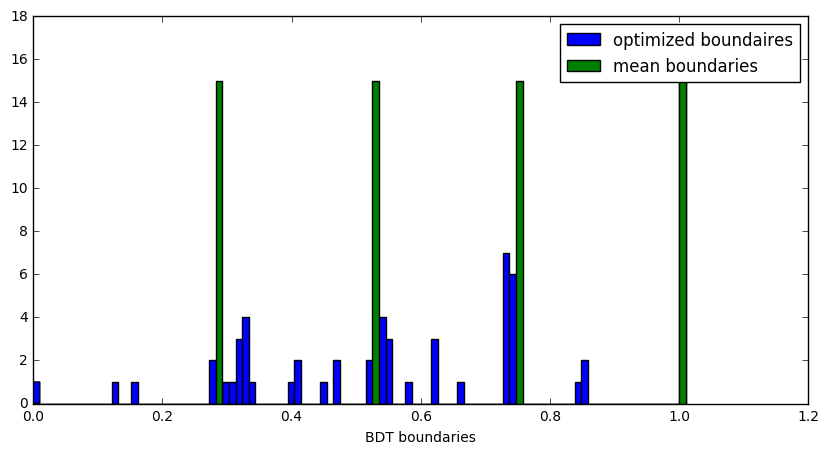

In [130]:
import matplotlib.pyplot as plt

# means[0] = 1.001
plt.figure(figsize=(10,5))
plt.hist(boundaries.ravel(),bins=100,range=[0.,1.01],label="optimized boundaires");
plt.hist(means,bins=100,range=[0.,1.01],weights=15.*np.ones_like(means),label="mean boundaries");
plt.xlabel("BDT boundaries")
plt.legend()
plt.show()

In [131]:
means

array([ 1.001     ,  0.75182353,  0.53082353,  0.29176471])